In [2]:
%reload_ext autoreload
%autoreload

%reload_ext autoreload
%autoreload 2
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from tqdm import tqdm

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 200,"figure.facecolor":"w","figure.figsize": (15,10)})

# import helper functions
from src.utls import prep_raw_data

In [3]:
# (import) helper functions
dir_proj = Path("__file__").parent.absolute()
dir_rawdata = Path.joinpath(dir_proj.parent.absolute(), "data")
dir_prep = Path.joinpath(dir_proj.parent.absolute(),"results")
print(dir_rawdata)


c:\Users\User\Desktop\kiel\tremor_music_ap\data


In [8]:
# load data
pd.read_csv(Path.joinpath(dir_prep,"single_subj_pow.csv"))
peaks = pd.read_csv(Path.joinpath(dir_prep,"single_subj_agg.csv"))

In [27]:
# define cfg vars
cfg_srate = 100
cfg_group = {1:"Standard & exp. music", 2:"Standard & unspecific music", 3: "Only Standard", 4: "Placebo"}
cfg_trial = {1: "Standing flexed", 2:"Sitting", 3: "Standing relaxed"}
cfg_visit = {1:"Inital", 2:"14-days"}

idx_axis_oi = peaks["axis"] == "y"
idx_task_oi = peaks["task"] == "Sitting flexed"
idx_visit_oi = peaks["visit"] != "Follow-up"
peaks.head()

,id,visit,task,axis,peak frequency,peak amplitude
0,BS0068,Inital,Standing flexed,x,5.75,4008.051865
1,BS0068,Inital,Standing flexed,y,5.75,170.250429
2,BS0068,Inital,Standing flexed,z,5.75,83232.759509
3,BS0068,Inital,Sitting flexed,x,5.25,1772.724313
4,BS0068,Inital,Sitting flexed,y,10.75,226.344435


<AxesSubplot:xlabel='axis', ylabel='peak amplitude'>

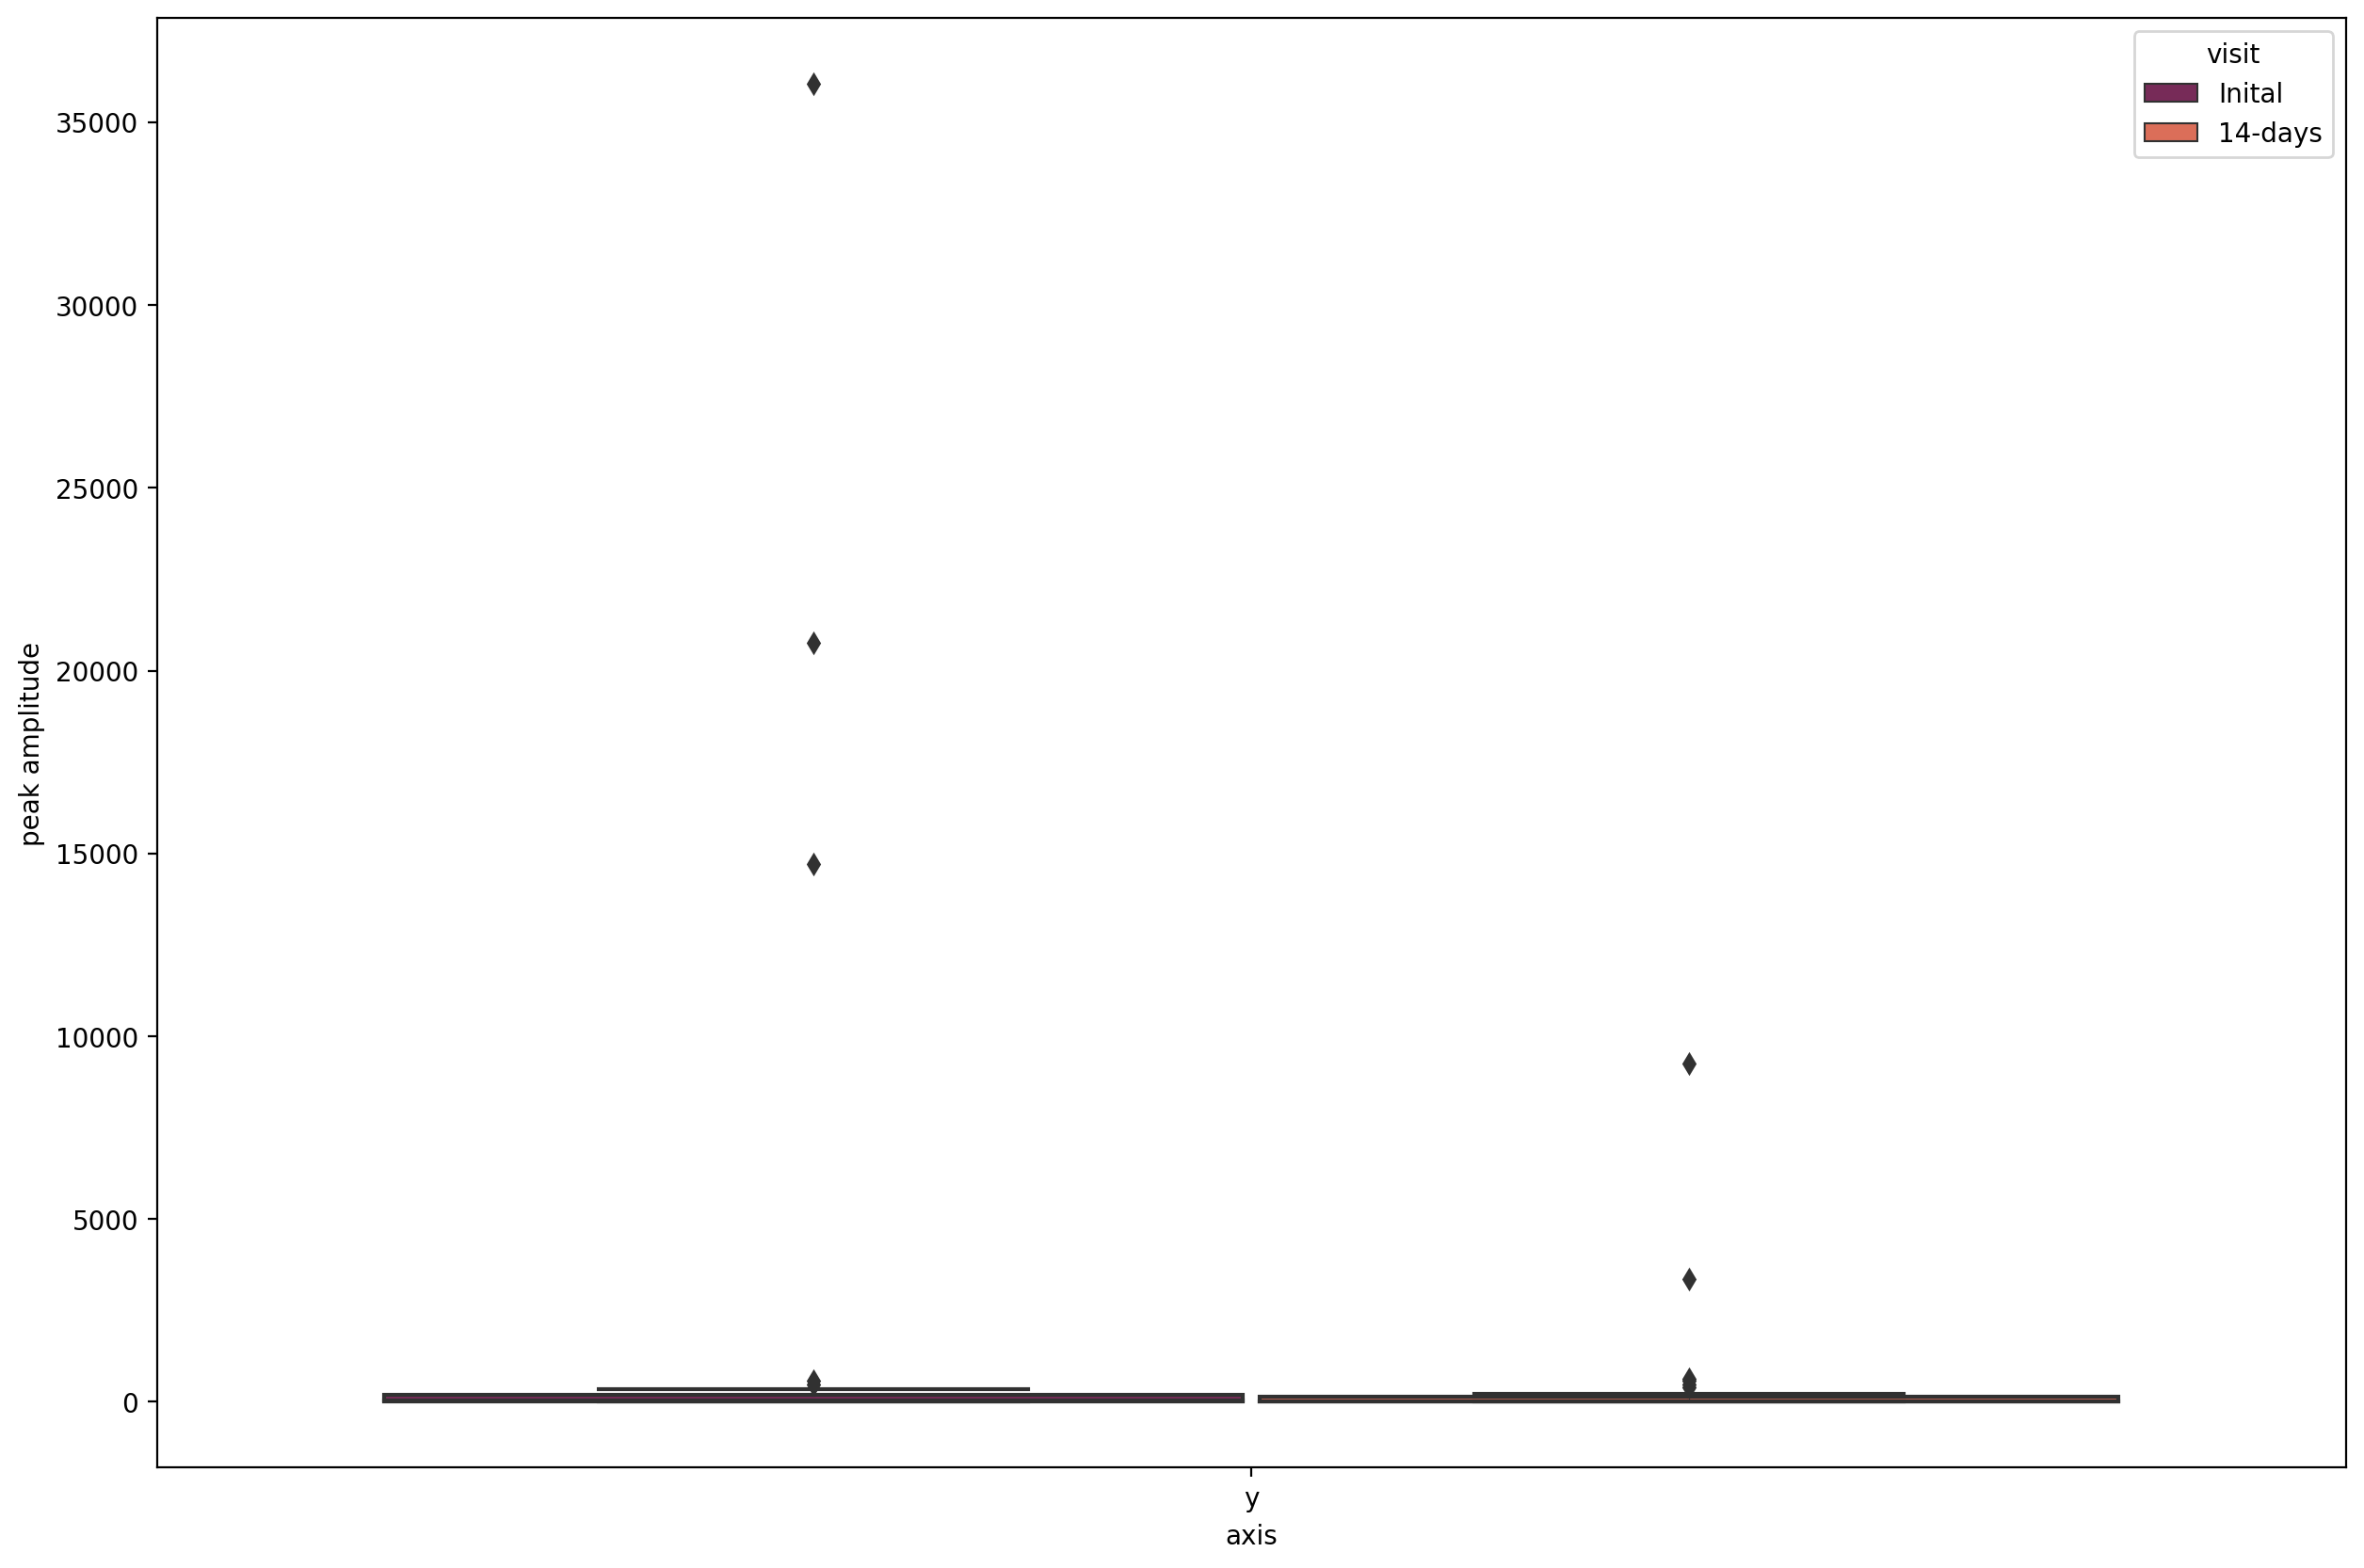

In [28]:
x_dat = peaks[np.logical_and.reduce([idx_axis_oi, idx_task_oi, idx_visit_oi])]
sns.boxplot(data=x_dat,x="axis",y="peak amplitude",hue="visit", palette="rocket")